In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
from scipy.stats import norm
import yfinance as yf

In [4]:
#import the data
BTC = yf.Ticker("BTC-USD")

In [8]:
data = yf.download("BTC-USD", start="2017-01-01", end="2021-11-29")['Adj Close']

[*********************100%***********************]  1 of 1 completed


In [9]:
data.head()

Date
2017-01-01     998.325012
2017-01-02    1021.750000
2017-01-03    1043.839966
2017-01-04    1154.729980
2017-01-05    1013.380005
Name: Adj Close, dtype: float64

In [11]:
data.tail()

Date
2021-11-25    57274.679688
2021-11-26    53569.765625
2021-11-27    54815.078125
2021-11-28    57248.457031
2021-11-29    57806.566406
Name: Adj Close, dtype: float64

In [12]:
log_returns = np.log(1 + data.pct_change())

In [13]:
log_returns.tail()

Date
2021-11-25    0.017512
2021-11-26   -0.066874
2021-11-27    0.022980
2021-11-28    0.043435
2021-11-29    0.009702
Name: Adj Close, dtype: float64

<AxesSubplot:xlabel='Date'>

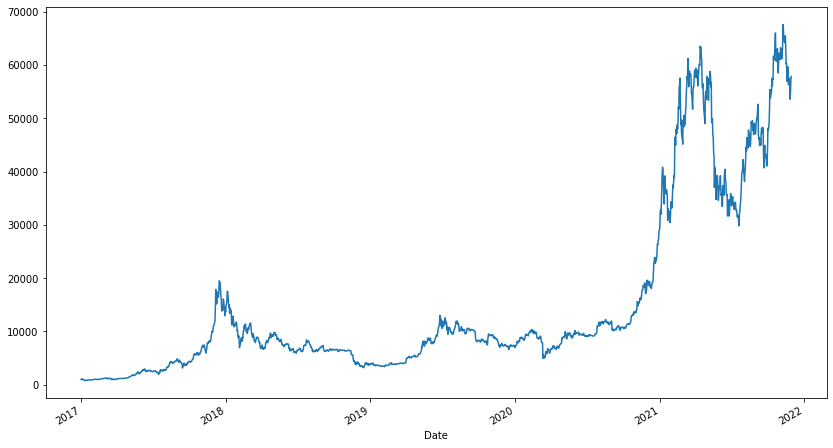

In [14]:
data.plot(figsize=(14,8))

<AxesSubplot:xlabel='Date'>

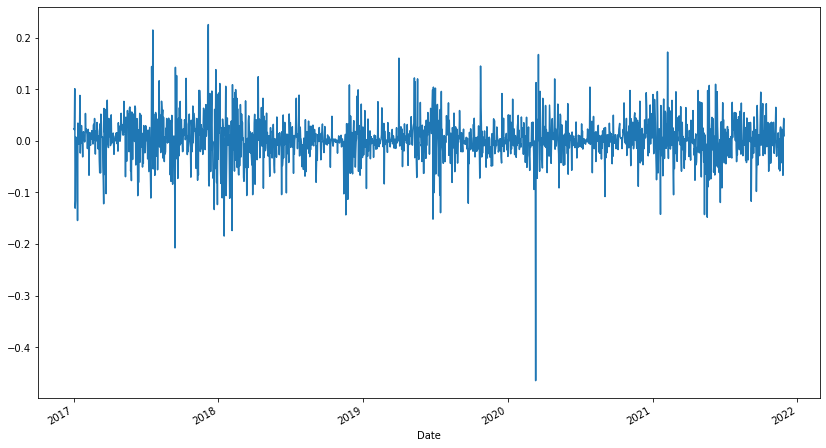

In [15]:
log_returns.plot(figsize=(14,8))

In [16]:
u = log_returns.mean()
u

0.0022687416249433136

In [17]:
var = log_returns.var()
var

0.0018029410257281114

In [18]:
stdev = log_returns.std()
stdev

0.0424610530454452

In [19]:
drift = u - (0.5 * var)
drift

0.001367271112079258

In [20]:
np.array(drift)

array(0.00136727)

In [21]:
np.array(stdev)

array(0.04246105)

In [22]:
#set up a 96% chance of occurance
norm.ppf(0.96)

1.7506860712521692

In [23]:
x = np.random.rand(10,2)
x

array([[0.31030008, 0.97544024],
       [0.97433688, 0.15689256],
       [0.81053023, 0.74272587],
       [0.37363684, 0.43102701],
       [0.43334903, 0.36425862],
       [0.9994661 , 0.95119724],
       [0.1797902 , 0.68527108],
       [0.75974093, 0.35905258],
       [0.78804042, 0.5766884 ],
       [0.22603974, 0.81932573]])

In [24]:
norm.ppf(x)

array([[-0.49499996,  1.96755269],
       [ 1.94874196, -1.00731147],
       [ 0.8798519 ,  0.65177203],
       [-0.3222363 , -0.17376009],
       [-0.16785411, -0.34709861],
       [ 3.27202494,  1.65657458],
       [-0.91616494,  0.4824901 ],
       [ 0.70546944, -0.36099235],
       [ 0.79964043,  0.19342875],
       [-0.75195275,  0.91279846]])

In [69]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.098736  ,  0.183488  ],
       [ 0.51844363, -0.3639941 ],
       [-1.66742769,  0.28010767],
       [ 0.21073909, -0.14449329],
       [ 1.38127461, -0.20075864],
       [ 0.11044084,  1.30818309],
       [-0.3567931 , -0.89932752],
       [ 0.36674492,  0.89244209],
       [-1.70502274,  1.75708069],
       [-0.24483147,  0.07864723]])

In [76]:
t_intervals = 100
interations = 20

In [77]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, interations)))
daily_returns

array([[0.95350627, 0.97938073, 1.05034697, ..., 1.00951187, 1.12085368,
        0.96162716],
       [0.96094317, 0.98989308, 1.01435962, ..., 0.97362839, 1.05939237,
        1.03726579],
       [1.00607924, 0.97977786, 0.91331685, ..., 1.01017731, 0.9589297 ,
        0.91921521],
       ...,
       [1.03136036, 1.05213116, 1.05667657, ..., 0.98655545, 0.99075725,
        0.97956224],
       [0.93377375, 0.94478737, 1.04453253, ..., 0.97929482, 1.00513704,
        0.97426414],
       [1.08061091, 1.06277107, 0.98830004, ..., 1.01452674, 0.97850711,
        0.96641956]])

In [78]:
s_zero = data.iloc[-1]
s_zero

57806.56640625

In [79]:
price_list = np.zeros_like(daily_returns)

In [80]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [81]:
price_list[0] = s_zero
price_list

array([[57806.56640625, 57806.56640625, 57806.56640625, ...,
        57806.56640625, 57806.56640625, 57806.56640625],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       ...,
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ],
       [    0.        ,     0.        ,     0.        , ...,
            0.        ,     0.        ,     0.        ]])

In [82]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [83]:
price_list

array([[57806.56640625, 57806.56640625, 57806.56640625, ...,
        57806.56640625, 57806.56640625, 57806.56640625],
       [55548.82530764, 57222.32009365, 58636.64646823, ...,
        56282.11409422, 61239.83547864, 59960.77388724],
       [55886.51978187, 56065.16209837, 53553.8372664 , ...,
        56854.91479304, 58724.69716797, 55116.85506987],
       ...,
       [56635.49911023, 79967.3266322 , 25503.60953481, ...,
        94836.12283074, 70906.70614217, 42184.19504564],
       [52884.74212669, 75552.12020149, 26639.34976401, ...,
        92872.52348708, 71270.95659666, 41098.54840576],
       [57147.82946258, 80294.6076273 , 26327.67034693, ...,
        94221.65834867, 69739.13765252, 39718.44115352]])

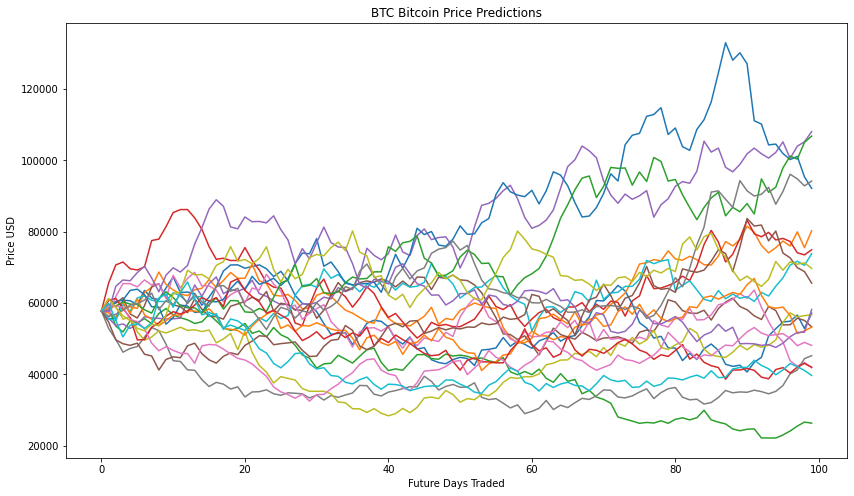

In [85]:
plt.figure(figsize=(14,8))
plt.title('BTC Bitcoin Price Predictions')
plt.xlabel('Future Days Traded')
plt.ylabel('Price USD')
plt.plot(price_list)